In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

#%pylab inline
from braket.circuits import Circuit
from braket.circuits import Gate
from braket.devices import LocalSimulator
import string
from math import pi
import random as rand

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# print all available gates in Amazon Braket
gate_set = [attr for attr in dir(Gate) if attr[0] in string.ascii_uppercase]
print(gate_set)


from qiskit.providers.aer import QasmSimulator 
from qiskit.tools.visualization import plot_bloch_multivector

['CCNot', 'CNot', 'CPhaseShift', 'CPhaseShift00', 'CPhaseShift01', 'CPhaseShift10', 'CSwap', 'CV', 'CY', 'CZ', 'ECR', 'H', 'I', 'ISwap', 'PSwap', 'PhaseShift', 'Rx', 'Ry', 'Rz', 'S', 'Si', 'Swap', 'T', 'Ti', 'Unitary', 'V', 'Vi', 'X', 'XX', 'XY', 'Y', 'YY', 'Z', 'ZZ']


# <Q|1> The Stern-Gerlach Experiments

## Introduction
##### The following experiment was first conceived by Otto Stern in 1921 and thereafter carried out by Walther Gerlach in 1922. The original experiment used a beam of silver atoms traveling through inhomogeneous magnetic fields and screens to show that angular momentum is quantized. This notebook will allow you to use real a real quantum computer to manipulate qubits and carry out the Stern-Gerlach experiment.

## Basic Properties of Qubit Operations and Measurements (Local)
##### We first walk through some simple qubit preparations and measurements to get a feel for how everything functions.

[1.+0.j 0.+0.j]


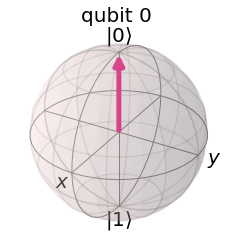

In [2]:
# Let's prepare a single qubit in the 'up' |0> state and visualize the state on the Bloch Sphere. 
# When we initialize a qubit with the code below, it defaults to starting in the 'up' |0> state.
# After the qubit is initialized, we apply a dummy rotation that doesn't actually do anything. 
# The qubit is still in whatever state it started in.

theta = 0
phi = 0 

psi = Circuit().ry(angle=theta, target=0)

# We run a simulation of the circuit that keeps track of the exact state. Note that when running on real quantum hardware, this is impossible
#  since the wavefunction collapses to either up or down when we measure. We can cheat by using a classical computer to model the quantum
#  evolution though. Once we want to describe more qubits this becomes computationally difficult and even impossible in some cases.

psi.state_vector()
device = LocalSimulator()

####device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")
task= device.run(psi, shots=0)
result = task.result()
statevector= result.values[0]
print(statevector)
plot_bloch_multivector(statevector)

Counter({'0': 1000})


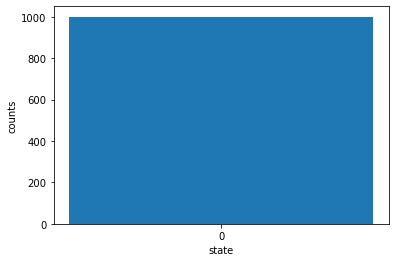

In [3]:
# In addition to simulating the full quantum wavefunction using a classical computer, we can use a classical computer to model how the quantum computer behaves.
# Below, we setup the same qubit we did previously but use our classical computer to model the wavefunction collapse.
# We should see that now, when we measure the final state, our result collapses to either up or down. Note again that while this is fast for a single qubit,
#  this becomes computationally difficult for many qubits.

# Setup the same state from before...
theta = 0
phi = 0 

psi = Circuit().ry(angle=theta, target=0)


# We want to model measurement of this qubit and visualize the results.
# Since the state of our qubit says it should be entirely 'down' then \ψ> = \0> and the only possibility of 
#  measurement should be \0>.

# Set up device to run a simulation on your classical computer
device = LocalSimulator()

#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# Run circuit many times and record the measurement of each iteration. Each iteration is called a 'shot' in quantum computing language.
# Here we try 1000 shots. What do you expect should happen here if we make the number of shots much smaller (10)? 
# What about if we make the shots much larger (100,000)?
result = device.run(psi, shots=1000).result()

# Get results from each measurement shot.
counts = result.measurement_counts

# Print results of each measurement shot.
print(counts)

# Plots the results.
plt.bar(counts.keys(), counts.values());
plt.xlabel('state');
plt.ylabel('counts');

[6.123234e-17+0.j 1.000000e+00+0.j]


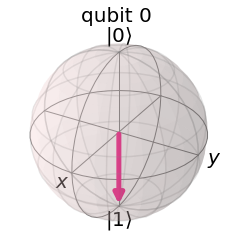

In [4]:
# As we expected, every run and measurement of the circuit produced the same result of up |0>. This is because we prepared the initial state such that
#  all the probability was in the up state.
# Let's now rotate the initial up state by pi radians about the y-axis. Look back at the plot of the up state from before.
# If we rotate the initial up state by pi radians about the y-axis, what state should the qubit be in? 

# This should result in a down state.

# Setup the circuit with a pi rotation about the y-axis.
theta = pi
psi = Circuit().ry(angle=theta, target=0)

# Again, we can cheat a bit by simulating the full state produced by the quantum circuit.

psi.state_vector()
device = LocalSimulator()
#####device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")
task= device.run(psi, shots=0)
result = task.result()
statevector= result.values[0]
print(statevector)
plot_bloch_multivector(statevector)

Counter({'1': 1000})


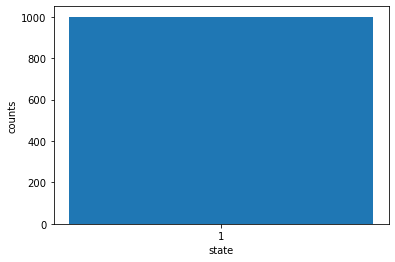

In [5]:
# Just as we likely expected, the result of doing a pi rotation about the y-axis result in a qubit in the down state.
# Let's now simulate the measurement of this state like we did before for the up state. What should we expect our measurements to give?

# Setup the circuit with a pi rotation about the y-axis.
theta = pi
psi = Circuit().ry(angle=theta, target=0)

# set up device to run a simulation on your classical computer
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# Run circuit many times and record the measurement of each iteration.
result = device.run(psi, shots=1000).result()

# Get results from each measurement shot.
counts = result.measurement_counts

# Print results of each measurement shot.
print(counts)

# Plots the results.
plt.bar(counts.keys(), counts.values());
plt.xlabel('state');
plt.ylabel('counts');

In [7]:
### SAVE FOR HIGHER LEVEL VERSION OF LAB ###

# #note that another way to get the down state is to use the X gate. The X gate allows to change |0> to |1> 
# #and |1> to |0>.
# psi = Circuit().x(0)

# # Plot:
# fig = plt.figure(figsize=plt.figaspect(1)*3)  # Square figure
# ax = fig.add_subplot(111,projection='3d') # Add a 3-D subplot
# ax.plot_wireframe(x_sphere, y_sphere, z_sphere,rstride=7, cstride=7, color='0.7') #Plot a sphere
# ax.plot_surface (x_sphere, y_sphere, z_sphere , rstride=6, cstride=6 ,color= 'pink', alpha = 0.1)
# ax.set_axis_off()
# ax.grid(visible=False)
# ax.text(-1, 0, 9, "|0>", color='black', size=20) 
# ax.text(-1, 0, -11, "|1>", color='black', size=20) 


# u=[r*cos(0)*sin(pi),r*sin(0)*sin(pi),r*cos(pi)]
# start= [0,0,0]
# ax.quiver(start[0],start[1],start[2], u[0], u[1], u[2], linewidth=4)


# ''''
# #using Qiskit to draw the bloch sphere:

# psi.state_vector()
# device = LocalSimulator()
# #####device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")
# task= device.run(psi, shots=0)
# result = task.result()
# statevector= result.values[0]

# plot_bloch_multivector(statevector)
# '''

Counter({'1': 1000})


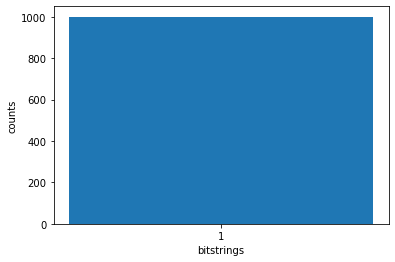

In [8]:
# We want to measure this qubit and visualize the results.
# Since the state of our qubit says it should be entirely 'up' then \ψ> = \1> and the only 
#possibility of measurement should be \1>.

# set up device to run a simulation on your classical computer
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# run circuit many times and record the measurement of each shot
result = device.run(psi, shots=1000).result()

# get measurement shots
counts = result.measurement_counts

# print counts
print(counts)


plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

[0.70710678+0.j 0.70710678+0.j]


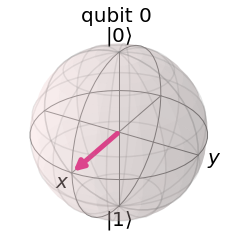

In [6]:
# Every run and measurement of the circuit produced the same result of down |1>. This is because we prepared the initial state such that
#  all the probability was in the down state.
# Let's do something a little different now. Instead of producing states that are either entirely up or entirely down, let's only rotate
#  halfway using a y-rotation by pi/2 radians. Can you picture what this state should look like on the Bloch Sphere?

# Setup the circuit with a pi/2 rotation about the y-axis.
psi = Circuit().ry(angle=pi/2, target=0)

# Simulate and plot the final state.
psi.state_vector()
device = LocalSimulator()
####device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")
task= device.run(psi, shots=0)
result = task.result()
statevector= result.values[0]
print(statevector)
plot_bloch_multivector(statevector)

Counter({'1': 525, '0': 475})


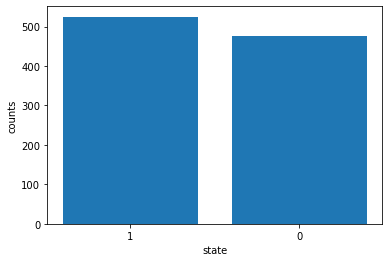

In [7]:
# We see the state produced is halfway between up and down. What do you think our measurements will now look like?

# Setup the circuit with a pi/2 rotation about the y-axis.
psi = Circuit().ry(angle=pi/2, target=0)

# set up device to run a simulation on your classical computer
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# Run circuit many times and record the measurement of each iteration.
result = device.run(psi, shots=1000).result()

# Get results from each measurement shot.
counts = result.measurement_counts

# Print results of each measurement shot.
print(counts)

# Plots the results.
plt.bar(counts.keys(), counts.values());
plt.xlabel('state');
plt.ylabel('counts');

In [11]:
# We see that roughly half of the measurements were up |0> and the other half were down |1>.
# This is because we prepared the state as $\ψ>=1/(2)^(1/2) |0> + 1/(2)^(1/2) |1>$.
# What happens if you alter the code such that the number of shots is very small? What about if the number of shots is very large?
# Can you explain your observation?

# The fact that you don't see exactly 50/50, depending on the number of shots used, is the topic of probability theory and statistics. Here, we have a system
#   that can be in one of two possible states. Systems like this are described by the Binomial Distribution, which we can use to show a similar result below.

{0: 529, 1: 471}


/Users/kenny/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


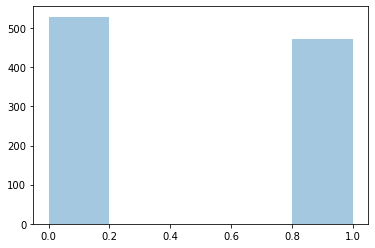

In [10]:


# Here, the variable 'size' is the same as the number of shots we take.
x = np.random.binomial(n=1, p=0.5, size=1000)
unique, counts = np.unique(x, return_counts=True)
counts_dict = dict(zip(unique, counts))
print(counts_dict)
sns.distplot(x, hist=True, kde=False)
plt.show()

# Convince yourself that this reproduces roughly the same results you see when you execute measurements of the half up half down qubit by varying the variable 'size'.

In [ ]:
# In the example we just looked at, the probability of measuring the system to be in either the up or the down state
#   was 50%. 


# The proper way to interpret the qubit's wavefunction $\psi$, or any waverfunction, is by taking it's inner product with itself.
#  We don't need to spend too much time delving into this. Suffice it to say that you can figure out the probability of the up state and the down state by
#  taking the coefficient of the state vector and squaring it. Do this for the state vector of the state we just measured. What do you find should be the probability
#  of measuring the up state. What about the down state? Do you think these probabilities should be related to each other?

# Play around with the code below by changing the angle of rotation and noticing how that affects the probability of getting either result.

In [ ]:
# We see the state produced is halfway between up and down. What do you think our measurements will now look like?

theta = "set the angle yourself!"
nshots = "set the number of shots yourself!"

# Setup the circuit with a pi/2 rotation about the y-axis.
psi = Circuit().ry(angle=theta, target=0)

# set up device to run a simulation on your classical computer
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# Run circuit many times and record the measurement of each iteration.
result = device.run(psi, shots=nshots).result()

# Get results from each measurement shot.
counts = result.measurement_counts

# Print results of each measurement shot.
print(counts)

# Plots the results.
plt.bar(counts.keys(), counts.values());
plt.xlabel('state');
plt.ylabel('counts');

In [ ]:
### SAVE FOR HIGHER LEVEL VERSION OF LAB ###

# We could have accomplished the same measurement outcome using what's called the Hadamard operator.
psi = Circuit().h(0)

# We can visualize the state created by this single-qubit quantum circuit by plotting it on the Bloch sphere
##TODO: insert Bloch sphere visualization of state here


# We can visualize the state created by this single-qubit quantum circuit by plotting it on the Bloch sphere
# Plot:
fig = plt.figure(figsize=plt.figaspect(1)*3)  # Square figure
ax = fig.add_subplot(111,projection='3d') # Add a 3-D subplot
ax.plot_wireframe(x_sphere, y_sphere, z_sphere,rstride=7, cstride=7, color='0.7') #Plot a sphere
ax.plot_surface (x_sphere, y_sphere, z_sphere , rstride=6, cstride=6 ,color= 'pink', alpha = 0.1)

ax.set_axis_off()
ax.grid(visible=False)
 
ax.text(-1, 0, 9, "|0>", color='black', size=20) 
ax.text(-1, 0, -11, "|1>", color='black', size=20) 


u=[r*cos(0)*sin(pi/2),r*sin(0)*sin(pi),r*cos(pi/2)]
start= [0,0,0]
ax.quiver(start[0],start[1],start[2], u[0], u[1], u[2], linewidth=4)

''''
#using Qiskit to draw the bloch sphere:

psi.state_vector()
device = LocalSimulator()
####device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")
task= device.run(psi, shots=0)
result = task.result()
statevector= result.values[0]

plot_bloch_multivector(statevector)
'''


# Note that while the state is still 'halfway' between \0> and \1>, it is rotated compared to the y-rotation.

In [ ]:
# We want to measure this qubit and visualize the results.
# Since the state of our qubit says it should be entirely 'up' then \ψ> = \1> and the only possibility of measurement should be \1>.

# set up device to run a simulation on your classical computer
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")


# run circuit many times and record the measurement of each shot
result = device.run(psi, shots=1000).result()

# get measurement shots
counts = result.measurement_counts

# print counts
print(counts)

# plot using Counter
 
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

## comparing Hadamard and Ry

In [ ]:
#another way to compare Ry(π/2) and H is by applying it twice on the same qubit: 



psi = Circuit().ry(angle=pi/2, target=0).ry(angle=pi/2, target=0)


# We can visualize the state created by this single-qubit quantum circuit by plotting it on the Bloch sphere
# Plot:


fig = plt.figure(figsize=plt.figaspect(1)*3)  # Square figure
ax = fig.add_subplot(111,projection='3d') # Add a 3-D subplot
ax.plot_wireframe(x_sphere, y_sphere, z_sphere,rstride=7, cstride=7, color='0.7') #Plot a sphere
ax.plot_surface (x_sphere, y_sphere, z_sphere , rstride=6, cstride=6 ,color= 'pink', alpha = 0.1)

ax.set_axis_off()
ax.grid(visible=False)

#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')


ax.text(-1, 0, 9, "|0>", color='black', size=20) 
ax.text(-1, 0, -11, "|1>", color='black', size=20) 


u=[r*cos(0)*sin(pi),r*sin(0)*sin(pi),r*cos(pi)]
start= [0,0,0]
ax.quiver(start[0],start[1],start[2], u[0], u[1], u[2], linewidth=4)



''''
#using Qiskit to draw the bloch sphere:

psi.state_vector()
device = LocalSimulator()
####device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")
task= device.run(psi, shots=0)
result = task.result()
statevector= result.values[0]

plot_bloch_multivector(statevector)
'''


title("Bloch  Sphere for Ry applied twice on |0>")




#now apply hadamard twice on the up state 

psi = Circuit().h(0).h(0)

# We can visualize the state created by this single-qubit quantum circuit by plotting it on the Bloch sphere
# Plot:

fig = plt.figure(figsize=plt.figaspect(1)*3)  # Square figure
ax = fig.add_subplot(111,projection='3d') # Add a 3-D subplot
ax.plot_wireframe(x_sphere, y_sphere, z_sphere,rstride=7, cstride=7, color='0.7') #Plot a sphere
ax.plot_surface (x_sphere, y_sphere, z_sphere , rstride=6, cstride=6 ,color= 'pink', alpha = 0.1)

ax.set_axis_off()
ax.grid(visible=False)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


ax.text(-1, 0, 9, "|0>", color='black', size=20)
ax.text(-1, 0, -11, "|1>", color='black', size=20)

u=[r*cos(0)*sin(0),r*sin(0)*sin(0),r*cos(0)]
start= [0,0,0]
ax.quiver(start[0],start[1],start[2], u[0], u[1], u[2], linewidth=4)


''''
#using Qiskit to draw the bloch sphere:

psi.state_vector()
device = LocalSimulator()
####device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")
task= device.run(psi, shots=0)
result = task.result()
statevector= result.values[0]

plot_bloch_multivector(statevector)
'''

title("Bloch  Sphere for Hadamard applied twice on |0>")


#note that the Hadamard applied twice on the up state leaves the state unchanged. 

In [ ]:
### SAVE FOR HIGHER LEVEL VERSION OF LAB ###

#plot of probability vs angles

theta = np.pi/3
phi= np.pi/5
state= Circuit().ry(0, theta).rz(0, phi)
print(state)


device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

result = device.run(state, shots=1000).result()
counts = result.measurement_counts
# print counts
print(counts)


values= list(counts.values())

print (values[1])

In [ ]:
# plot using Counter
 
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [ ]:
angles= linspace(0.1, (pi-0.1), 10)  # can't use 0 and π because it doesn't return a super position 
                                       # sometimes prints 'index out of range' because there is no superposition
phi= np.pi/5

counts0=[]
counts1=[]
total=[]
num_shots= 1000

for theta in angles:
    state= Circuit().ry(0, theta).rz(0, phi)
    #print(state)

    device = LocalSimulator()
    #device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")
    result = device.run(state, shots=num_shots).result()
    counts = result.measurement_counts
    # print counts
    #print(counts)
    
    values= list(counts.values())
    
    counts0.append(counts['0']/num_shots)
    counts1.append(counts['1']/num_shots)
    total.append((values[0]+values[1])/num_shots)
    #print(values)
    
    
  
plot(angles, counts0, label = "probability of |0> state")
plot(angles, counts1, label = "probability of |1> state")
plot(angles, total , label = "total probability")

title("probability vs theta")
xlabel("Theta (rad)")
ylabel("probability")
legend()


In [ ]:
angles= linspace(0.1, (pi-0.1), 100)  # can't use 0 and π because it doesn't return a super position 
                                       # sometimes prints 'index out of range' because there is no superposition
phi= np.pi/5

counts0=[]
counts1=[]
total=[]
num_shots= 1000

for theta in angles:
    state= Circuit().ry(0, theta).rz(0, phi)
    #print(state)
    
    device = LocalSimulator()
    #device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")
    result = device.run(state, shots=num_shots).result()
    counts = result.measurement_counts
  
    #print(counts)
    
    values= list(counts.values())
    
    counts0.append(counts['0']/num_shots)
    counts1.append(counts['1']/num_shots)
    total.append((values[0]+values[1])/num_shots)

    
    
plot(angles, counts0, label = "probability of |0> state")
plot(angles, counts1, label = "probability of |1> state")
plot(angles, total , label = "total probability")

title("probability vs theta")
xlabel("Theta (rad)")
ylabel("probability")
legend()


In [ ]:
# comparing experimental values with analytical values for state |0>

angles= linspace(0.1, (pi-0.1), 100)

analytical0=[]

for theta in angles: 
    analytical0.append((cos(theta/2))**2)
    
#print (analytical0)
plot(angles, counts0, label = "probability of |0> state")
plot(angles, analytical0 , label = "expectation for |0> state")    

xlabel("Theta (rad)")
ylabel("probability")
legend()


In [ ]:
#changing phi and fixing theta= np.pi/3

angles= linspace(0.1, (2*pi-0.1), 10)  # can't use 0 and π because it doesn't return a super position 
                                       # sometimes prints 'index out of range' because there is no superposition
    
theta= np.pi/3

counts0=[]
counts1=[]
total=[]


num_shots=1000
for phi in angles:
    state= Circuit().ry(0, theta).rz(0, phi)
    #print(state)
    
    device = LocalSimulator
    #device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")
    result = device.run(state, shots=num_shots).result()
    counts = result.measurement_counts
    # print counts
    #print(counts)
    
    values= list(counts.values())
    
    counts0.append(counts['0']/num_shots)
    counts1.append(counts['1']/num_shots)
    total.append((values[0]+values[1])/num_shots)

    
    
plot(angles, counts0, label = "probability of |0> state")
plot(angles, counts1, label = "probability of |1> state")
plot(angles, total , label = "total probability")

title("probability vs theta")
xlabel("Theta (rad)")
ylabel("probability")
legend()


In [ ]:
# At this point, you should have a basic understanding of how to think about and measure qubits. Now we want to use qubits to implement the Stern-Gerlach experiment.
# If you haven't already, please read Ch. 40-2 on the Stern-Gerlach experiment. This was a foundational experiment that experimentally proved a facet of quantum mechanics, that the electron possesses a type of
#  angular momentum called 'spin' that is quantized. This means that the electron has an associated variable called 'spin' that can be in a state of either up or down when we measure it. If we prepare an
#  electron without measuring its spin, then the spin can be in some superposition of up and down. This is exactly like we saw previously when we described qubits. In fact, for our purposes here, we can think of
#  the electron as being a qubit. We want to show that by thinking of the electron as a qubit, and implementing the same procedure as in the Stern-Gerlach experiment, that we reproduce the same results. If we are
#  are able to show the same results then we conclude that the electron is indeed a qubit obeying the laws of quantum mechanics.

Pictured below is the first of the Stern-Gerlach experiments, where an electron in a random spin state is fed into the left-hand side of the picture. This electron passes into a device
originally implemented as a magnetic field in the z-direction. Since the spin of the electron and the magnetic field have an interaction, we expect that measurements on the right-hand side of the magnetic field device will be discretely split into two spots. We expect this because we hypothesize the electron has spin that, when measured, must be either up or down. Since the different spin states are deflected differently by the magnetic field, one spot would be due to the up spin and the other spot would be due to the down spin state. If we feed many randomly oriented electrons into this first magnetic field, we expect that roughly 50% will end up deflected up and 50% will be deflected down. This is exactly the Stern-Gerlach experiment's first and most surprising result. If the spin of the electron were not quantized and could take on any value/orientation, we would expect the measurement on the other size of the magnetic field to be a continuous distribution. Here, we are able to represent the deflection by a z-direction magnetic field of a spin up or spin down qubit by simply measuring the state.

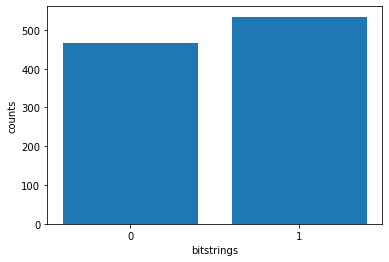

In [11]:
total_counts = {"0":0,"1":0}
num_experiments = 1000
for i in range(num_experiments):
    
    theta = pi*rand.random()
    phi = 2*pi*rand.random()
    psi = Circuit().ry(angle=theta, target=0).rz(angle=phi, target=0)
    
    # set up device
    device = LocalSimulator()
    #device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

    # run circuit
    result = device.run(psi, shots=1).result()

    # get result of shots
    counts = result.measurement_counts
    total_counts["0"]+=counts["0"]
    total_counts["1"]+=counts["1"]

    # print result
    # print("θ = ", theta)
    # print("ϕ = ", phi)
    # print(counts)

# plot using Counter
plt.bar(total_counts.keys(), total_counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

When we measure a randomly generated spin state we find roughly a 50/50 chance of the state being measured as either up or down. If you changes the values of 'num_experiments' and 'shots' what do you find? Explain your results as best you can.

We should have found that preparing many randomly oriented qubits and measuring gives the same result as preparing only pi/2 y-rotated states. Therefore, since the number of individual experiments we run is more expensive than the number of shots per experiment, we can measure a pi/2 rotated state many times rather than prepare many random states and measure each once.

All we have done so far is effectively the first part of our first experiment. We generated a bunch of randomly oriented 'electrons', represented as qubits, and enacted the deflection by a z-direction magnetic field via measuring these qubits. The next part of the first Stern-Gerlach experiment will block out the states measured as spin down and feed the states measured as spin up into another z-direction magnetic field.   'To implement this first experiment using qubits, we will first rotate the intial up qubit so that it winds up in a random state. To implement the same physics as the magnetic field measurement, we will then measure the state of qubit. Measurement has the same effect as applying a z-direction magnetic field since measurement forces the result to be either up or down, just as the magnetic field did for the silver atoms. We then block the qubits measured in the down state and feed only the up state qubits into another measurement device. Overall, this experiment using qubits is the same as the first Stern-Gerlach experiment depicted below.

<img src="imgs/experiment_a.png" width=600 height=600 />

θ =  0.5534203426313203
ϕ =  5.737828637206489
Counter({'0': 93, '1': 7})


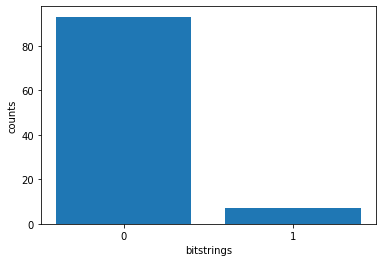

In [14]:
# Prepare an arbitrary initial state
theta = pi*rand.random()
phi = 2*pi*rand.random()
psi = Circuit().ry(angle=theta, target=0).rz(angle=phi, target=0)

# set up device
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# run circuit
result = device.run(psi, shots=100).result()

# get result of shots
counts = result.measurement_counts

# print result
print("θ = ", theta)
print("ϕ = ", phi)
print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

Counter({'0': 93})


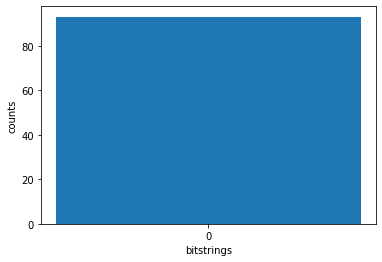

In [15]:
# Let's block out the down (1) state and only feed the up (0) into the next measurement
# From your knowledge of quantum mechanics so far, what do you predict we should measure if we
#. measure the same qubit twice?

# Take number of up (0) states from the first measurement and assign it
#. as the number of shots we take in this measurement
num_zeros = counts['0']

# Initialize the qubit state so that it aligns with our previous measurement of up (0)
theta = 0
phi = 0
psi = Circuit().ry(angle=theta, target=0).rz(angle=phi, target=0)

# set up device
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# run circuit
result = device.run(psi, shots=num_zeros).result()

# get result of shots
counts = result.measurement_counts

print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');


In [ ]:
# If you guessed that measuring twice would just give the same result twice, you were correct.
#  When we measure the state, we collapse the wavefunction to give a single result. If we measure
#. that collapsed wavefunction again, it is still collapsed and will yield the same measurement.

# Since this experiment used a random initial state, go re-run the code once or twice to convince yourself
#. the starting state did not influence our result for measuring a state twice.

<img src="imgs/experiment_b.png" width=600 height=600 />

In [ ]:
# Use an arbitrary initial state

theta = 2*pi*rand.random()
phi = 2*pi*rand.random()
psi = Circuit().ry(angle=theta, target=0).rz(angle=phi, target=0)
# set up device
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# run circuit
result = device.run(psi, shots=10000).result()

# get result of shots
counts = result.measurement_counts


# print result
print("θ = ", theta)
print("ϕ = ", phi)
print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [ ]:
# Let's block out the '1' state and only feed the '0's into the next measurement
num_zeros = counts['0']

# Setting ϕ=0 and θ=π/2 is equivalent to the SGx magnetic selector
theta = pi/2
phi = 0
psi = Circuit().ry(angle=theta, target=0).rz(angle=phi, target=0)

# set up device
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# run circuit
result = device.run(psi, shots=num_zeros).result()

# get result of shots
counts = result.measurement_counts

print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

<img src="imgs/experiment_c.png" width=600 height=600 />

In [ ]:
# Use an arbitrary initial state

theta = 2*pi*rand.random()
phi = 2*pi*rand.random()
psi = Circuit().ry(angle=theta, target=0).rz(angle=phi, target=0)
# set up device
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# run circuit
result = device.run(psi, shots=10000).result()

# get result of shots
counts = result.measurement_counts


# print result
print("θ = ", theta)
print("ϕ = ", phi)
print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [ ]:
# Let's block out the '1' state and only feed the '0's into the next measurement
num_zeros = counts['0']

# Setting ϕ=0 and θ=π/2 is equivalent to the SGx magnetic selector
theta = pi/2
phi = 0
psi = Circuit().ry(angle=theta, target=0).rz(angle=phi, target=0)

# set up device
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# run circuit
result = device.run(psi, shots=num_zeros).result()

# get result of shots
counts = result.measurement_counts

print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [ ]:
# Let's block out the '1' state and only feed the '0's into the next measurement
num_zeros = counts['0']

# Setting ϕ=0 and θ=-π/2 is equivalent to the SGz magnetic selector
theta = -pi/2
phi = 0
psi = Circuit().ry(angle=theta, target=0).rz(angle=phi, target=0)

# set up device
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# run circuit
result = device.run(psi, shots=num_zeros).result()

# get result of shots
counts = result.measurement_counts

print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [ ]:
psi = Circuit().ry(angle=pi, target=0).ry(angle=pi/2, target=0)

In [ ]:
psi.state_vector()

In [ ]:
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")
task= device.run(psi, shots=0)
result = task.result()
print(result.values[0])


## ex 1

In [ ]:
# Use an arbitrary initial state
theta = 2*pi*rand.random()
phi = 2*pi*rand.random()
psi = Circuit().ry(angle=theta, target=0).rz(angle=phi, target=0)

# set up device
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# run circuit
result = device.run(psi, shots=10000).result()

# get result of shots
counts = result.measurement_counts


# print result
print("θ = ", theta)
print("ϕ = ", phi)
print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [ ]:
# Let's block out the '1' state and only feed the '0's into the next measurement
num_zeros = counts['0']

# Setting ϕ=0 and θ=π/2 is equivalent to the SGx magnetic selector
theta = pi/2
phi = 0
psi = Circuit().ry(angle=theta, target=0)

# set up device
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# run circuit
result = device.run(psi, shots=num_zeros).result()

# get result of shots
counts = result.measurement_counts

print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [ ]:
# Let's block out the '0' state and only feed the '1's into the next measurement
num_ones = counts['1']

# Setting ϕ=0 and θ=π/2 is equivalent to the SGx magnetic selector
theta = pi/2
phi = 0
psi = Circuit().ry(angle=theta, target=0)
# set up device
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# run circuit
result = device.run(psi, shots=num_ones).result()

# get result of shots
counts = result.measurement_counts

print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [ ]:
# Let's block out the '0' state and only feed the '1's into the next measurement
num_ones = counts['1']

# Setting ϕ=0 and θ=-π/2 is equivalent to changin to the SGz magnetic selector     
'''need to use a - when going from SGx to SGz'''
theta = -pi/2
phi = 0
psi = Circuit().ry(angle=theta, target=0)

device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# run circuit
result = device.run(psi, shots=num_ones).result()

# get result of shots
counts = result.measurement_counts

print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [ ]:
# Let's block out the '0' state and only feed the '1's into the next measurement
num_ones = counts['1']

# Setting ϕ=0 and choosing a random θ is equivalent to changin to the SGθ magnetic selector     

theta = 2*pi*rand.random()
phi = 0

psi=Circuit().ry(angle=theta, target=0)

# set up device
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# run circuit
result = device.run(psi, shots=num_ones).result()

# get result of shots
counts = result.measurement_counts

print (theta)
print (counts)
print(counts['0']/num_ones,counts['1']/num_ones)
print ((np.cos(theta/2))**2,(np.sin(theta/2))**2)
        
# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [ ]:
print(counts['0']/num_ones,counts['1']/num_ones)
print ((np.cos(theta))**2,(np.sin(theta))**2)

## ex 2

In [ ]:
# Use an arbitrary initial state
theta = 2*pi*rand.random()
phi = 2*pi*rand.random()
psi = Circuit().ry(angle=theta, target=0)

# set up device
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# run circuit
result = device.run(psi, shots=10000).result()

# get result of shots
counts = result.measurement_counts


# print result
print("θ = ", theta)
print("ϕ = ", phi)
print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [ ]:
# Let's block out the '1' state and only feed the '0's into the next measurement
num_zeros = counts['0']

# Setting ϕ=0 and θ=π/2 is equivalent to the SGx magnetic selector
theta = pi/2
phi = 0
psi = Circuit().ry(angle=theta, target=0)

# set up device
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# run circuit
result = device.run(psi, shots=num_zeros).result()

# get result of shots
counts = result.measurement_counts

print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [ ]:
# Let's both the '0' and 1' states and feed them into the next measurement
num_shots = counts['0']+ counts['1']

# Setting ϕ=0 and θ=-π/2 is equivalent to changing back to the SGz magnetic selector
theta = - pi/2
phi = 0
psi = Circuit().ry(angle=theta, target=0)

# set up device
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# run circuit
result = device.run(psi, shots=num_shots).result()

# get result of shots
counts = result.measurement_counts

print(counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [ ]:
# Let's block out the '0' state and only feed the '1's into the next measurement
num_ones = counts['1']

# Setting ϕ=0 and choosing a random θ is equivalent to changin to the SGθ magnetic selector     

theta = 2*pi*rand.random()
phi = 0
psi = Circuit().ry(angle=theta, target=0)

# set up device
device = LocalSimulator()
#device= AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")

# run circuit
result = device.run(psi, shots=num_ones).result()

# get result of shots
counts = result.measurement_counts

print (theta)
print(counts['0']/num_ones,counts['1']/num_ones)
print ((np.cos(theta/2))**2,(np.sin(theta/2))**2)
        
# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');